In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
carDF = pd.read_csv('../data/auto-mpg.csv', header=None)
carDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

carDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
labels = ['USA','EU','KOR']

x = [carDF[carDF['origin'] == 1]['mpg'],
carDF[carDF['origin'] == 2]['mpg'],
carDF[carDF['origin'] == 3]['mpg']]

x

[0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 392    27.0
 393    27.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 249, dtype: float64,
 19     26.0
 20     25.0
 21     24.0
 22     25.0
 23     26.0
        ... 
 354    34.5
 359    28.1
 360    30.7
 375    36.0
 394    44.0
 Name: mpg, Length: 70, dtype: float64,
 14     24.0
 18     27.0
 29     27.0
 31     25.0
 53     31.0
        ... 
 382    34.0
 383    38.0
 384    32.0
 385    38.0
 390    32.0
 Name: mpg, Length: 79, dtype: float64]

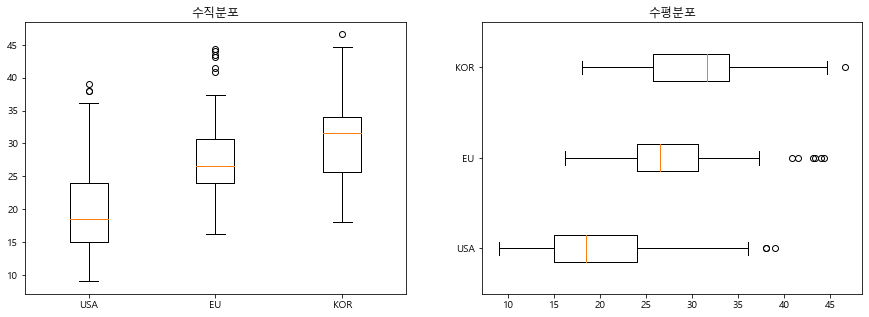

In [5]:
# 제조국가별 연비분포(수직, 수평)

fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.boxplot(x, labels=labels)
ax02.boxplot(x, labels=labels, vert=False)

ax01.set_title('수직분포')
ax02.set_title('수평분포')

plt.show()
plt.close()

### 문제01]
- 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
- 배기량이 4 이하인 자동차와 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 높은지 알아보자

In [6]:
xls = pd.ExcelFile('../data/car_mpg.xlsx')
carDF = xls.parse(xls.sheet_names[0])
carDF

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [7]:
displ_4 = carDF[carDF['displ'] <= 4]['hwy'].mean()
displ_5 = carDF[carDF['displ'] >= 5]['hwy'].mean()
print('배기량이 4 이하인 자동차의 고속도로 연비 평균은 {}이고, 5 이상인 자동차의 고속도로 연비 평균은 {}이다.'.format(displ_4, displ_5))

배기량이 4 이하인 자동차의 고속도로 연비 평균은 25.96319018404908이고, 5 이상인 자동차의 고속도로 연비 평균은 18.07894736842105이다.


In [8]:
displ = carDF.groupby(carDF.displ).agg(np.mean).loc[:, 'hwy']

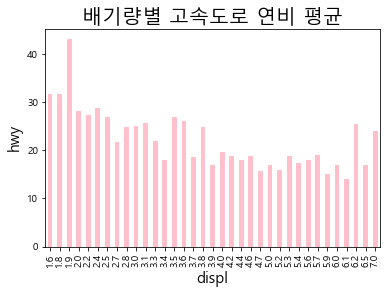

In [9]:
fig = plt.figure()

displ.plot(kind='bar', color='pink')
plt.title('배기량별 고속도로 연비 평균', size=20) 
plt.xlabel('displ', size=15)
plt.ylabel('hwy', size=15)

plt.show()
plt.close()

### 문제 02]
- 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
- audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

In [10]:
audi = carDF[carDF['manufacturer'] == 'audi']['cty'].mean()
toyota = carDF[carDF['manufacturer'] == 'toyota']['cty'].mean()
print('Audi의 도시연비는 {}이고, Toyota의 도시연비는{}이다.'.format(audi, toyota))

Audi의 도시연비는 17.61111111111111이고, Toyota의 도시연비는18.529411764705884이다.


In [11]:
manu = carDF.groupby(carDF.manufacturer).agg(np.mean).loc[:, 'cty']

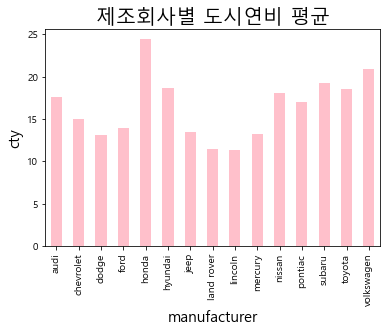

In [12]:
fig = plt.figure()

manu.plot(kind='bar', color='pink')
plt.title('제조회사별 도시연비 평균', size=20) 
plt.xlabel('manufacturer', size=15)
plt.ylabel('cty', size=15)

plt.show()
plt.close()

### 문제 03]
- chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
- 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.
- bar plot 이용한 시각화


- 데이터 전처리 : 연료가격 변수 추가(price_fl)
- c : 가스 2.35, d : 디젤 2.38, e : 에탄올 2.11 , p : 고급휘발유 2.76 , r : 보통휘발유 2.22


### 문제 04]
- 우리가 만든 연료 가격 프레임을 웝본 프레임에 병합

In [18]:
chevrolet = carDF[carDF['manufacturer'] == 'chevrolet']['hwy']
ford = carDF[carDF['manufacturer'] == 'ford']['hwy']
honda = carDF[carDF['manufacturer'] == 'honda']['hwy']


18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
74    NaN
75    NaN
76    NaN
77    NaN
78    NaN
79    NaN
80    NaN
81    NaN
82    NaN
83    NaN
84    NaN
85    NaN
86    NaN
87    NaN
88    NaN
89    NaN
90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
Name: hwy, dtype: float64